In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json

In [2]:
df = pd.read_csv("filtered_movies.csv")

In [3]:
df.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN


In [4]:
np.shape(df)

(3587, 19)

In [5]:
outliers_removed = df[( np.abs(stats.zscore(df["budget"])) < 3 )  | ( np.abs(stats.zscore(df["revenue"])) < 3 )]
outliers_removed

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k
1,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004,NaN,100,Documentary,9372,en,65000,28575078,0.002275,439.616585,7.2,108792,NaN
2,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN
3,8453,tt0876294,movie,Zombie Diaries,The Zombie Diaries,0,2006,NaN,85,"Horror,Sci-Fi",25035,en,9300,2000000,0.004650,215.053763,4.0,4755,NaN
4,9342,tt0907657,movie,Once,Once,0,2007,NaN,86,"Drama,Music,Romance",5723,en,160000,20710513,0.007726,129.440706,7.8,116662,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,10702,tt1935194,movie,Overdrive,Overdrive,0,2017,NaN,93,"Action,Adventure,Crime",404733,en,28210303,7793,3619.954190,0.000276,5.3,14982,NaN
3583,414,tt1376213,movie,The Adventurer: The Curse of the Midas Box,The Adventurer: The Curse of the Midas Box,0,2013,NaN,100,"Adventure,Family,Fantasy",227707,en,25000000,6399,3906.860447,0.000256,5.4,6779,NaN
3584,9979,tt7869070,movie,The Fanatic,The Fanatic,0,2019,NaN,88,"Crime,Thriller",509853,en,18000000,3153,5708.848716,0.000175,4.2,11981,NaN
3585,3185,tt0254703,movie,The Point Men,The Point Men,0,2001,NaN,100,"Action,Drama",46943,en,6100000,714,8543.417367,0.000117,4.3,1161,NaN


In [6]:
np.shape(outliers_removed)

(3536, 19)

### Average yearly ROI


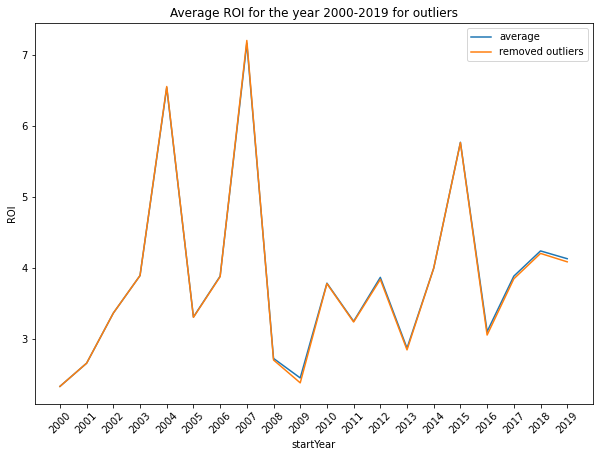

In [7]:
fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=df.groupby("startYear")["ROI"].mean(), label='average')
g.set_xticks(df.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019')

g = sns.lineplot(data=outliers_removed.groupby("startYear")["ROI"].mean(), label='removed outliers')
g.set_xticks(outliers_removed.groupby("startYear").mean().index)
g.set_title('Average ROI for the year 2000-2019 for outliers')

plt.tick_params(axis='x', rotation=45)

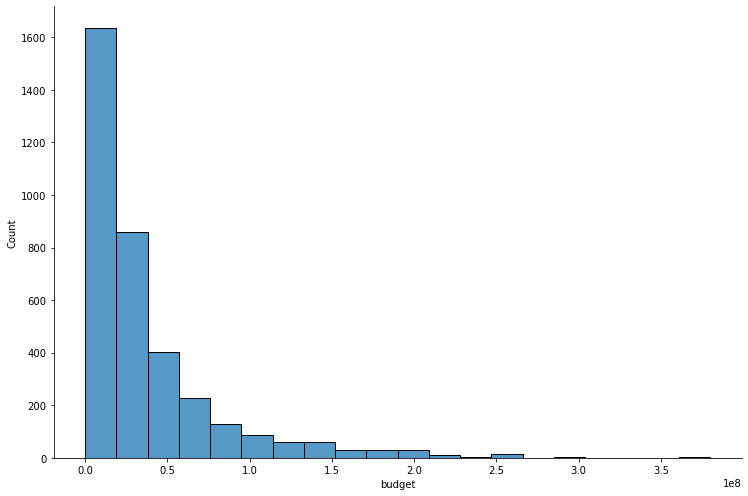

In [8]:
sns.displot(df, x="budget", bins=20, height=7, aspect=1.5)

plt.show()

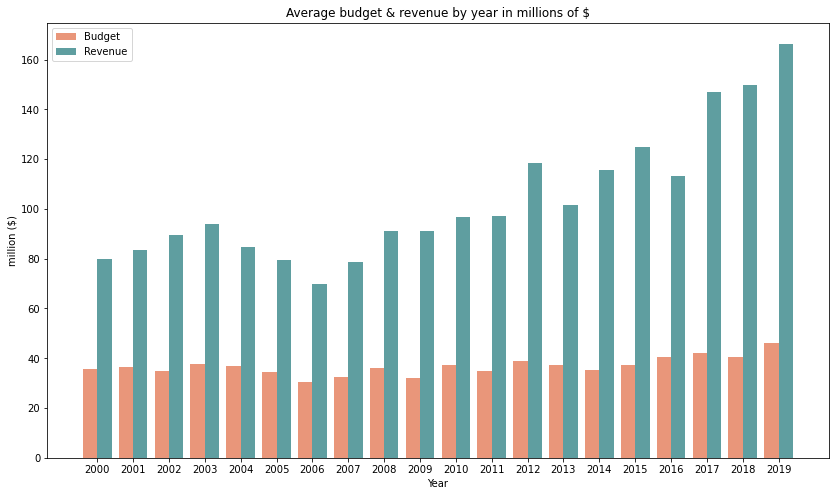

In [23]:
df_year_mean = df.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(df_year_mean.index.astype('int64'), df_year_mean.budget / 1e6,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(df_year_mean.index.astype('int64'), df_year_mean.revenue/ 1e6,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=df_year_mean.index.astype('int64'), labels=df_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')



plt.xlabel('Year')
plt.ylabel('million ($)')
plt.title('Average budget & revenue by year in millions of $')

plt.legend()
plt.show()

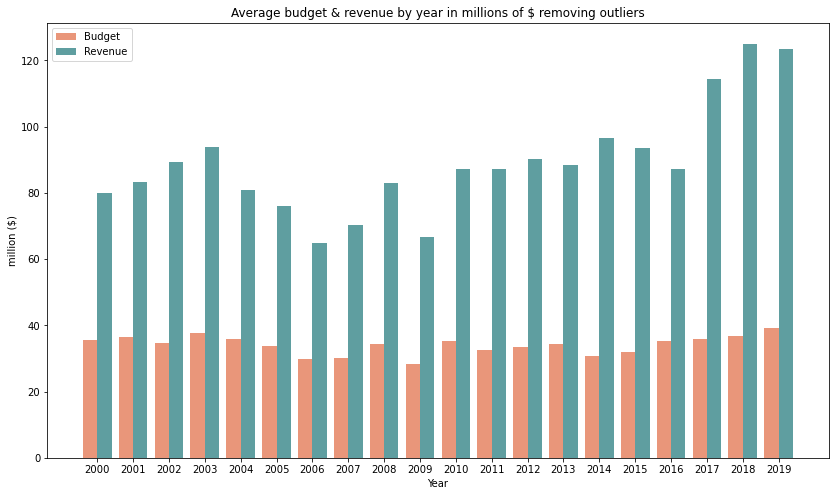

In [22]:
outliers_removed_df_year_mean = outliers_removed.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(outliers_removed_df_year_mean.index.astype('int64'), outliers_removed_df_year_mean.budget / 1e6,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(outliers_removed_df_year_mean.index.astype('int64'), outliers_removed_df_year_mean.revenue/ 1e6,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=outliers_removed_df_year_mean.index.astype('int64'), labels=outliers_removed_df_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')



plt.xlabel('Year')
plt.ylabel('million ($)')
plt.title('Average budget & revenue by year in millions of $ removing outliers')

plt.legend()
plt.show()

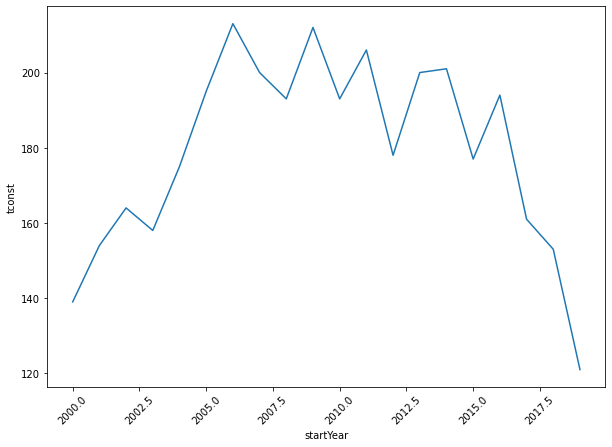

In [11]:
df.groupby("startYear").count()

fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=df.groupby("startYear")["tconst"].count() )
# g.set_title('Average ROI for the year 2000-2019')

plt.tick_params(axis='x', rotation=45)

In [12]:
df.groupby("startYear").count()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18
startYear,,,,,,,,,,,,,,,,,,
2000,139,139,139,139,139,139,0,139,139,139,139,139,139,139,139,139,139,0
2001,154,154,154,154,154,154,0,154,154,154,154,154,154,154,154,154,154,0
2002,164,164,164,164,164,164,0,164,164,164,164,164,164,164,164,164,164,0
2003,158,158,158,158,158,158,0,158,158,158,158,158,158,158,158,158,158,0
2004,175,175,175,175,175,175,0,175,175,175,175,175,175,175,175,175,175,0
2005,195,195,195,195,195,195,0,195,195,195,195,195,195,195,195,195,195,0
2006,213,213,213,213,213,213,0,213,213,213,213,213,213,213,213,213,213,0
2007,200,200,200,200,200,200,0,200,200,200,200,200,200,200,200,200,200,1
2008,193,193,193,193,193,193,0,193,193,193,193,193,193,193,193,193,193,0


In [13]:
df.groupby("startYear").mean()

,index,isAdult,endYear,runtimeMinutes,tmdb_id,budget,revenue,ratio,ROI,averageRating,numVotes
startYear,,,,,,,,,,,
2000,879.935252,0.0,NaN,108.266187,16177.374101,3.547281e+07,7.999276e+07,11.858209,2.335901,6.169784,118394.366906
2001,2390.071429,0.0,NaN,107.006494,14597.162338,3.647263e+07,8.330553e+07,65.856757,2.662997,6.166883,114749.363636
2002,4581.682927,0.0,NaN,105.884146,11361.646341,3.472768e+07,8.933774e+07,5.514083,3.368795,6.175000,118936.408537
2003,7334.968354,0.0,NaN,108.392405,13035.500000,3.772328e+07,9.378364e+07,17.538546,3.897706,6.160127,124509.550633
2004,5438.720000,0.0,NaN,105.880000,12728.251429,3.677001e+07,8.474879e+07,12.125902,6.546165,6.262857,132554.428571
2005,4901.035897,0.0,NaN,108.323077,12763.005128,3.447495e+07,7.944004e+07,5.160357,3.313629,6.221026,112071.630769
2006,6149.615023,0.0,NaN,106.098592,12817.633803,3.049854e+07,6.968534e+07,8.247627,3.889020,6.109859,107611.413146
2007,5509.155000,0.0,NaN,106.550000,11133.135000,3.256263e+07,7.885078e+07,18.481018,7.171135,6.337000,121829.245000
2008,6118.979275,0.0,NaN,105.834197,14079.948187,3.597753e+07,9.128713e+07,9.880289,2.730205,6.169948,136987.808290


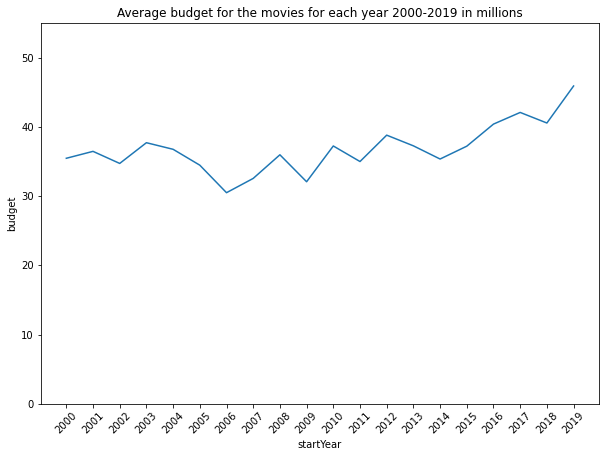

In [25]:

fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=df.groupby("startYear")["budget"].mean()/1e6 )
g.set_xticks(outliers_removed.groupby("startYear").mean().index)
g.set_title('Average budget for the movies for each year 2000-2019 in millions')
g.set_ylim(0,55)

plt.tick_params(axis='x', rotation=45)

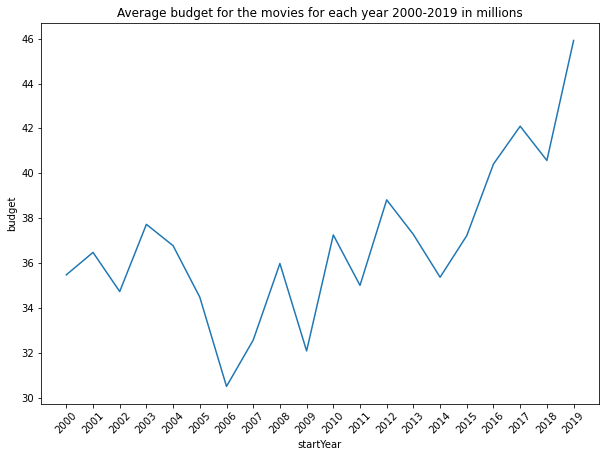

In [27]:

fig = plt.gcf()
fig.set_size_inches(10, 7)


g = sns.lineplot(data=df.groupby("startYear")["budget"].mean()/1e6 )
g.set_xticks(outliers_removed.groupby("startYear").mean().index)
g.set_title('Average budget for the movies for each year 2000-2019 in millions')

plt.tick_params(axis='x', rotation=45)

In [19]:
df.groupby("startYear")["budget"].mean()

startYear
2000    3.547281e+07
2001    3.647263e+07
2002    3.472768e+07
2003    3.772328e+07
2004    3.677001e+07
2005    3.447495e+07
2006    3.049854e+07
2007    3.256263e+07
2008    3.597753e+07
2009    3.208039e+07
2010    3.725089e+07
2011    3.500269e+07
2012    3.881464e+07
2013    3.727155e+07
2014    3.536494e+07
2015    3.722084e+07
2016    4.041324e+07
2017    4.209841e+07
2018    4.057083e+07
2019    4.592058e+07
Name: budget, dtype: float64